# Random Subject Representative Selection

Number of approved subjects: 898
['B63018964']


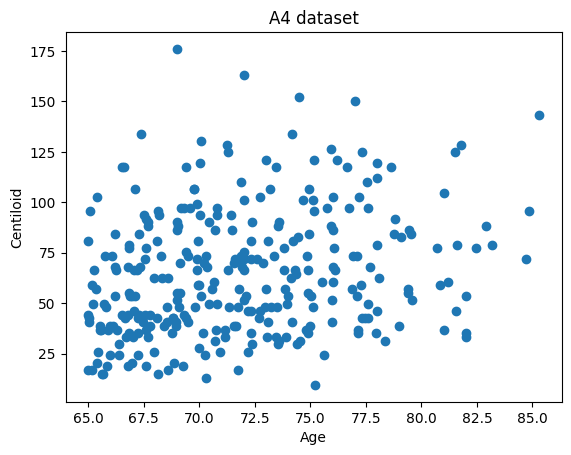

In [8]:
# A4 dataset

path = '/pool/home/AD_Multimodal/Estudio_A4/A4data.csv'

import pandas as pd
import numpy as np

df = pd.read_csv(path)

# Open the qc json file
import json

with open('/pool/home/AD_Multimodal/Estudio_A4/fmri_slicetiming_outputderivatives/rs_preproc/qc_decisions_total.json') as f:
    qc = json.load(f)

# Filter the data to only subjects that have a 'yes' in the qc json file

approved = []

for subject in qc.keys():
    if qc[subject] == 'yes':
        new_subject = subject[4:]
        approved.append(new_subject)

print('Number of approved subjects:', len(approved))

data = df[df['BID'].isin(approved)]

outlier = [subject for subject in approved if subject not in data['BID'].values]

print(outlier)


# Randomly select 400 samples nd print their centiloid and age

np.random.seed(15)
df = data.sample(300)

df = df[['centiloid', 'PTAGE', 'PTGENDER', 'BID']]

# Plot the data
import matplotlib.pyplot as plt

plt.scatter(df['PTAGE'], df['centiloid'])
plt.xlabel('Age')
plt.ylabel('Centiloid')
plt.title('A4 dataset')
plt.show()

False


In [2]:
# Take Male in PTGENDER and make it 0, take Female and make it 1
df['PTGENDER'] = df['PTGENDER'].apply(lambda x: 0 if x == 'Male' else 1)

# Normalize centiloid and age
df['centiloid'] = df['centiloid'] / df['centiloid'].max()

# Min max normalization for age
df['PTAGE'] = (df['PTAGE'] - df['PTAGE'].min()) / (df['PTAGE'].max() - df['PTAGE'].min())

df.head()

,centiloid,PTAGE,PTGENDER,BID
849,0.292946,0.717734,0,B73809446
1143,0.407322,0.337438,1,B94391989
966,0.230559,0.399507,1,B82966948
1067,0.220161,0.026601,1,B89217991
314,0.386527,0.340394,0,B34729472


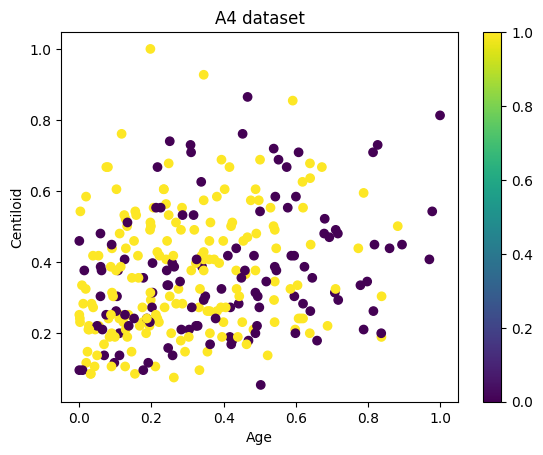

In [3]:
# plot these 3 variables in a plot with hue PTGENDER uisng matplotlib

plt.scatter(df['PTAGE'], df['centiloid'], c=df['PTGENDER'])
plt.xlabel('Age')
plt.ylabel('Centiloid')
# color map scale
plt.colorbar()
plt.title('A4 dataset')
plt.show()

In [48]:
# Make a random_400_txt file

create = True

if create:

    for subject in df['BID']:
        string = '/pool/home/AD_Multimodal/Estudio_A4/fmri_slicetiming_outputderivatives/rs_preproc/sub-' + subject + '/ses-01/sub-' + subject + '_ses-01_task-rest_bold_desc-ts-mc-cleaned-final-reg-template.nii.gz'
        with open('/pool/home/AD_Multimodal/Estudio_A4/fmri_slicetiming_outputderivatives/rs_preproc/my_list_rand_yes_300.txt', 'a') as f:
            f.write(string + '\n')

In [49]:
# Save the df to a csv file

save = True

if save:
    df.to_csv('/pool/home/AD_Multimodal/Estudio_A4/random_300.csv', index=False)

In [4]:
save2 = True

if save2:
    data.to_csv('/pool/home/AD_Multimodal/Estudio_A4/random_898.csv', index=False)